In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/melbourne-housing-snapshot/melb_data.csv


## Data processing and Choosing training features:

In [2]:
# Load data
melbourne_file_path = '/kaggle/input/melbourne-housing-snapshot/melb_data.csv'
melbourne_data = pd.read_csv(melbourne_file_path)
# Filter rows with missing values
melbourne_data = melbourne_data.dropna(axis=0)
# Choose target and features
y = melbourne_data.Price
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea',
                      'YearBuilt', 'Lattitude', 'Longtitude']
X = melbourne_data[melbourne_features]
X.head()

,Rooms,Bathroom,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude
1,2,1.0,156.0,79.0,1900.0,-37.8079,144.9934
2,3,2.0,134.0,150.0,1900.0,-37.8093,144.9944
4,4,1.0,120.0,142.0,2014.0,-37.8072,144.9941
6,3,2.0,245.0,210.0,1910.0,-37.8024,144.9993
7,2,1.0,256.0,107.0,1890.0,-37.8060,144.9954


### Checking the data 

In [3]:
X.describe()

,Rooms,Bathroom,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.576340,471.006940,141.568645,1964.081988,-37.807904,144.990201
std,0.971079,0.711362,897.449881,90.834824,38.105673,0.075850,0.099165
min,1.000000,1.000000,0.000000,0.000000,1196.000000,-38.164920,144.542370
25%,2.000000,1.000000,152.000000,91.000000,1940.000000,-37.855438,144.926198
50%,3.000000,1.000000,373.000000,124.000000,1970.000000,-37.802250,144.995800
75%,4.000000,2.000000,628.000000,170.000000,2000.000000,-37.758200,145.052700
max,8.000000,8.000000,37000.000000,3112.000000,2018.000000,-37.457090,145.526350


Text(0.5, 1.0, 'The number of Rooms per House')

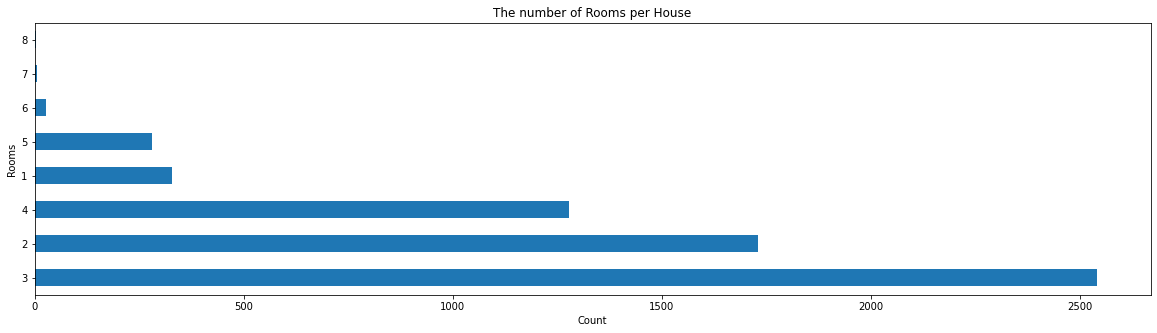

In [4]:
# Checking the Rooms features
figure(figsize=(20,5))
X['Rooms'].value_counts().plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Rooms')
plt.title('The number of Rooms per House')

Text(0.5, 1.0, 'The number of Bathrooms per House')

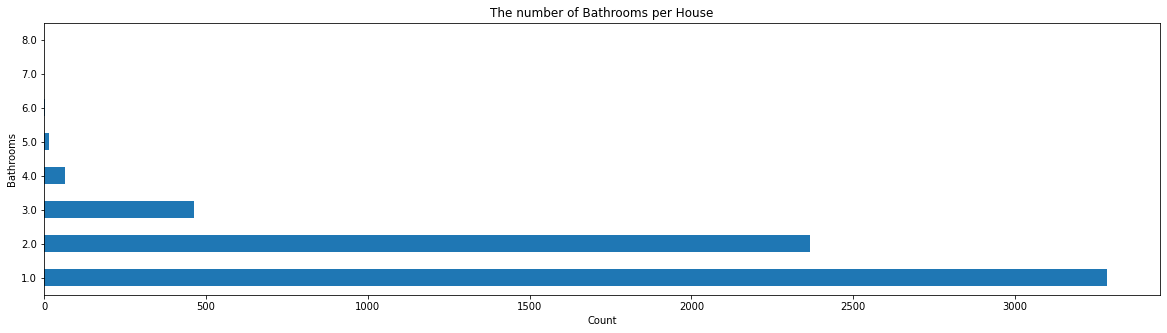

In [5]:
# Checking the Bathrooms features
figure(figsize=(20,5))
X['Bathroom'].value_counts().plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Bathrooms')
plt.title('The number of Bathrooms per House')

Text(0.5, 1.0, 'The Landsize area per House')

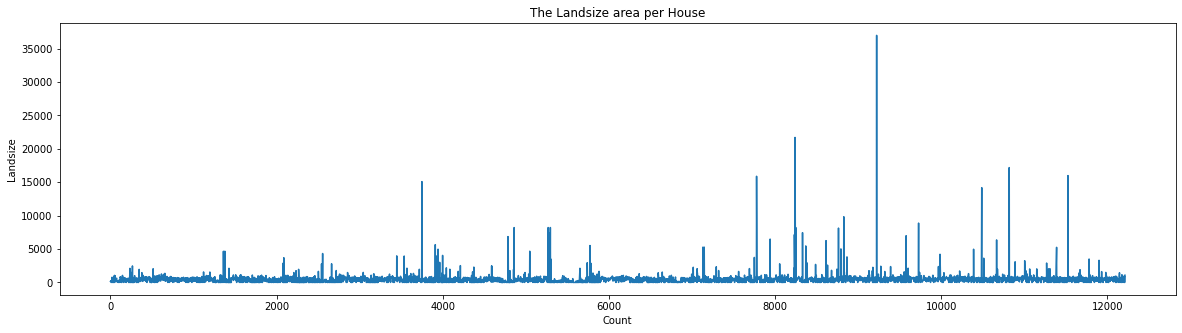

In [6]:
# Checking the Landsize features
figure(figsize=(20,5))
X['Landsize'].plot(kind='line')
plt.xlabel('Count')
plt.ylabel('Landsize')
plt.title('The Landsize area per House')

Text(0.5, 1.0, 'The Building Area per House')

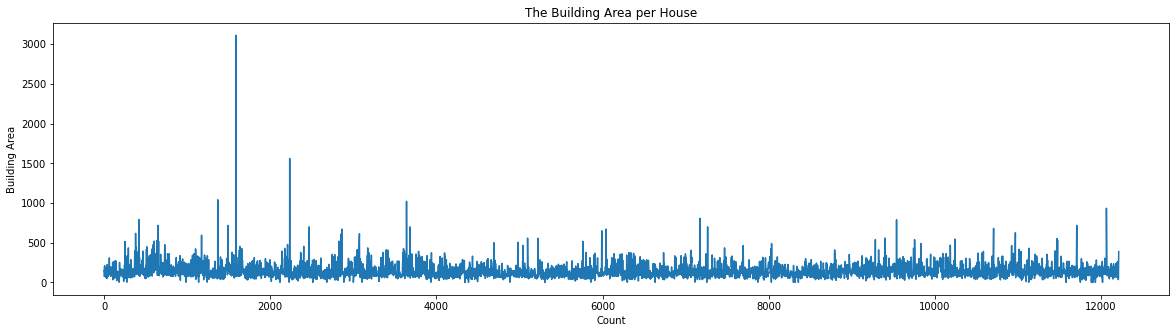

In [7]:
# Checking the Bathrooms features
figure(figsize=(20,5))
X['BuildingArea'].plot(kind='line')
plt.xlabel('Count')
plt.ylabel('Building Area')
plt.title('The Building Area per House')

Text(0.5, 1.0, 'The Year Built House')

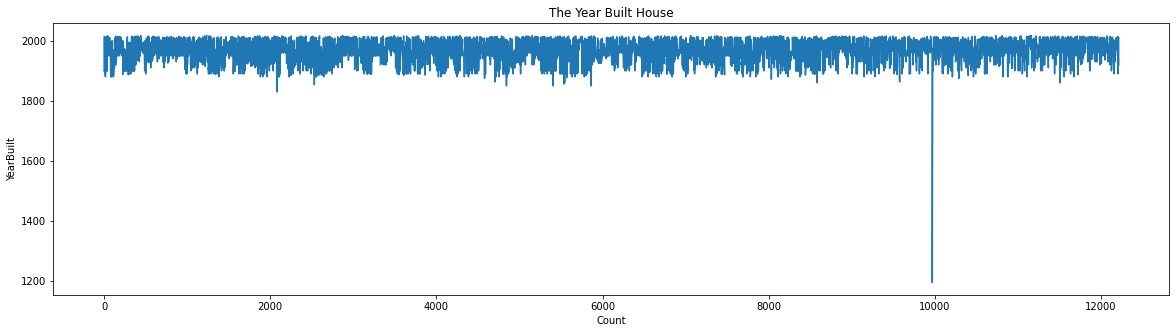

In [8]:
# Checking the Bathrooms features
figure(figsize=(20,5))
X['YearBuilt'].plot(kind='line')
plt.xlabel('Count')
plt.ylabel('YearBuilt')
plt.title('The Year Built House')


## Split data into Training and validation 

In [9]:
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)

# Building the Model using "Decision Tree Regressor"

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=42)

from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(forest_model.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


# Start training and Fitting the model

In [11]:
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(train_X.head())

val_predictions = forest_model.predict(val_X)
# Calculate the mean absolute error of your Random Forest model on the validation data
val_mae = mean_absolute_error(val_predictions, val_y)

print("First in-sample predictions:", melb_preds)
print("Actual target values for those homes:", train_y.head().tolist())
print("The MSE: ", mean_absolute_error(train_y.head(), melb_preds))
print("Validation MAE: {:,.0f}".format(val_mae))

First in-sample predictions: [ 987915.  461925.  508475. 1061975. 1849340.]
Actual target values for those homes: [1060000.0, 390000.0, 502000.0, 1055000.0, 1900000.0]
The MSE:  41624.0
Validation MAE: 192,616


### Helper functions:

In [12]:
from sklearn.metrics import mean_absolute_error

# Calculate the Mean Average Error
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = RandomForestRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)


## Random Hyperparameter Grid
To use RandomizedSearchCV, we first need to create a parameter grid to sample from during fitting:

In [13]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


# Random Search Training
Now, we instantiate the random search and fit it like any Scikit-Learn model:

In [14]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(train_X, train_y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   3.7s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   9.1s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   8.8s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=  41.9s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   9.7s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  29.2s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimato

/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   3.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  12.7s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=  42.8s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   9.7s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   5.9s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  29.1s
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   5.4s
[CV] END bootstrap=True, max_depth=70,

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [15]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [16]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(train_X, train_y)
base_accuracy = evaluate(base_model, val_X, val_y)

Model Performance
Average Error: 202763.7360 degrees.
Accuracy = 82.40%.
